In [70]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns




import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 엑셀 파일 불러오기

df = pd.read_excel("C:/Users/hanyo/Downloads/titanic.xlsx", engine="openpyxl")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [71]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [72]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [73]:
print("결측치 개수 확인:\n", df.isnull().sum())

결측치 개수 확인:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [74]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

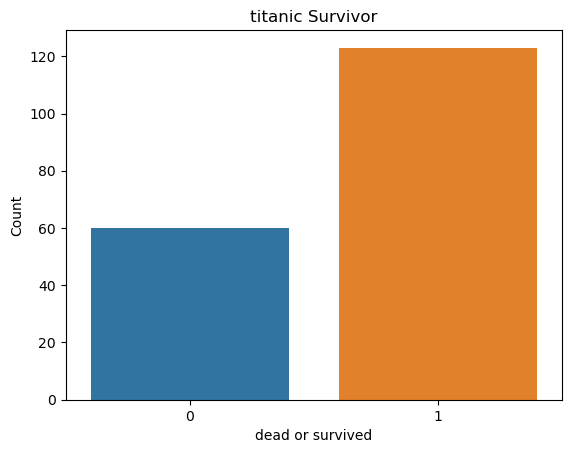

1    123
0     60
Name: Survived, dtype: int64

In [75]:
# 레이블 확인 (그래프, 숫자)

sns.countplot(data = df, x="Survived")
plt.xlabel("dead or survived")
plt.ylabel("Count")
plt.title("titanic Survivor")

plt.show()

df['Survived'].value_counts()

In [76]:
# 무관한 칼럼 제거하기
columns_to_drop = ['Ticket','Cabin','Fare','PassengerId','Embarked','Name'] 
df = df.drop(columns=columns_to_drop, errors='ignore')
df

,Survived,Pclass,Sex,Age,SibSp,Parch
1,1,1,female,38.0,1,0
3,1,1,female,35.0,1,0
6,0,1,male,54.0,0,0
10,1,3,female,4.0,1,1
11,1,1,female,58.0,0,0
...,...,...,...,...,...,...
871,1,1,female,47.0,1,1
872,0,1,male,33.0,0,0
879,1,1,female,56.0,0,1
887,1,1,female,19.0,0,0


In [78]:
# 인코딩
encoder = LabelEncoder()
categorical_cols = ['Sex', 'Pclass','Age','SibSp','Parch','Survived']  # 변환할 칼럼 입력
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print("\n변환 후 'Survived' 분포:\n", df['Survived'].value_counts())

# 최종 데이터 확인
print("\n 데이터 전처리 완료! 데이터프레임 미리보기:")
df



변환 후 'Survived' 분포:
 1    123
0     60
Name: Survived, dtype: int64

 데이터 전처리 완료! 데이터프레임 미리보기:


,Survived,Pclass,Sex,Age,SibSp,Parch
1,1,0,0,32,1,0
3,1,0,0,28,1,0
6,0,0,1,49,0,0
10,1,2,0,4,1,1
11,1,0,0,53,0,0
...,...,...,...,...,...,...
871,1,0,0,42,1,1
872,0,0,1,26,0,0
879,1,0,0,51,0,1
887,1,0,0,12,0,0


In [80]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [84]:
X=df.drop('Survived',axis=1)
y=df['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [85]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7391304347826086
[[ 2  7]
 [ 5 32]]


In [87]:
 # Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.8478260869565217
[[ 6  3]
 [ 4 33]]


In [88]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.8260869565217391
[[ 8  1]
 [ 7 30]]


C:\Users\hanyo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [89]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8260869565217391
[[ 8  1]
 [ 7 30]]


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.782608695652174
[[ 6  3]
 [ 7 30]]
